# so sánh ảnh gốc và ảnh sau lọc thông thấp Gauss

<>:6: SyntaxWarning: invalid escape sequence '\I'
<>:6: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Home\AppData\Local\Temp\ipykernel_23220\244035370.py:6: SyntaxWarning: invalid escape sequence '\I'
  img = Image.open("C:\ImageProcessing\Doan-xulyanh\img\moon.jpg").convert("L")


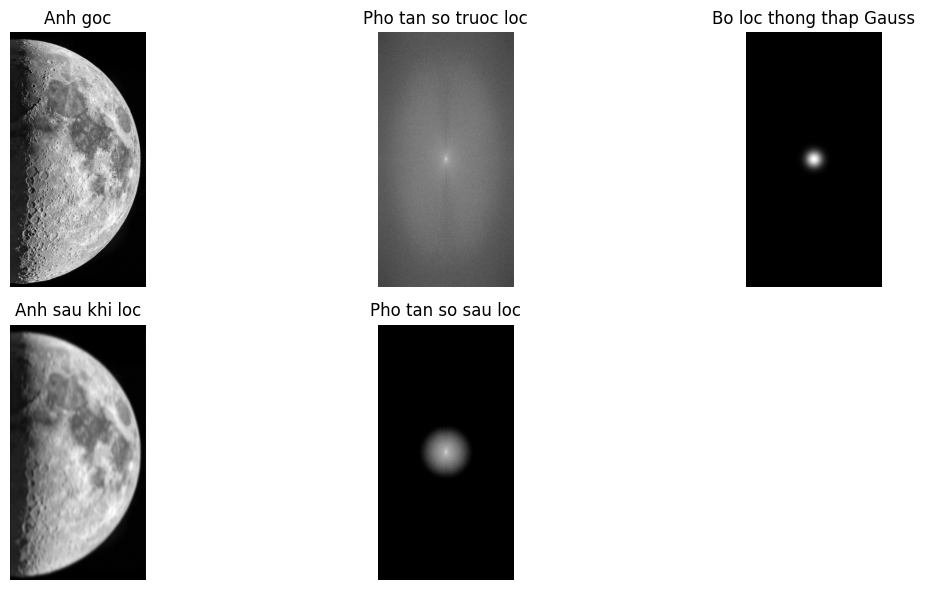

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# === 1️⃣ Doc anh goc ===
img = Image.open("C:\ImageProcessing\Doan-xulyanh\img\moon.jpg").convert("L")
f = np.array(img)
P, Q = f.shape

# === 2️⃣ Bien doi Fourier anh goc ===
F = np.fft.fft2(f)
F_shift = np.fft.fftshift(F)
spectrum_before = np.log(1 + np.abs(F_shift))

# === 3️⃣ Tao bo loc thong thap Gauss ===
sigma = 30
u = np.arange(P) - P/2
v = np.arange(Q) - Q/2
U, V = np.meshgrid(u, v, indexing="ij")
D2 = U**2 + V**2
H = np.exp(-D2 / (2 * sigma**2))

# === 4️⃣ Ap dung bo loc ===
G = H * F_shift
spectrum_after = np.log(1 + np.abs(G))  # pho tan so sau khi loc

# === 5️⃣ Bien doi nguoc ve mien khong gian ===
G_ishift = np.fft.ifftshift(G)
g = np.abs(np.fft.ifft2(G_ishift))

# === 6️⃣ Ve cac ket qua ===
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(f, cmap="gray")
plt.title("Anh goc")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(spectrum_before, cmap="gray")
plt.title("Pho tan so truoc loc")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(H, cmap="gray")
plt.title("Bo loc thong thap Gauss")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(g, cmap="gray")
plt.title("Anh sau khi loc")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(spectrum_after, cmap="gray")
plt.title("Pho tan so sau loc")
plt.axis("off")

plt.tight_layout()
plt.show()
